# Assignment 3 - Kanak Agarwal

### Toeplitz Matrix Multiplication

In [43]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Naive Toeplitz
def naive_toeplitz_mult(t_col, t_row, x):
    n = len(x)
    T = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i >= j:
                T[i,j] = t_col[i-j]
            else:
                T[i,j] = t_row[j-i]
    return T @ x

# Recursive Strassen-like Toeplitz
def toeplitz_strassen(t_col, t_row, x):
    n = len(x)
    mid = n // 2

    if n <= 32:  # base case - just use naive
        return naive_toeplitz_mult(t_col, t_row, x)

    # Split vectors
    x1 = x[:mid]
    x2 = x[mid:]
    
    # Split into submatrices
    A_col = t_col[:mid]
    A_row = t_row[:mid]
    
    B_col = t_col[:mid]
    B_row = t_row[mid:]
    
    C_col = t_col[mid:]
    C_row = t_row[:mid]
    
    # Recursively compute three multiplications
    P1 = toeplitz_strassen(A_col, A_row, x1 + x2)
    P2 = toeplitz_strassen(A_col - C_col, A_row - C_row, x1)
    P3 = toeplitz_strassen(A_col + B_col, A_row + B_row, x2)
    
    # Combine
    y1 = P1 - P3
    y2 = P1 + P2
    return np.concatenate([y1, y2])

time_naive = []
time_strassen = []

n = [256, 512, 1024, 2048, 4096, 8192]  # Change index for different sizes
for i in n:
    t_col = np.random.rand(i)
    t_row = np.random.rand(i)
    t_row[0] = t_col[0]  # Ensure first elements are the same
    x = np.random.rand(i)

    start = time.time()
    y = naive_toeplitz_mult(t_col, t_row, x)
    end = time.time()
    time_naive.append(end - start)

    start = time.time()
    y = toeplitz_strassen(t_col, t_row, x)
    end = time.time()
    time_strassen.append(end - start)


# Plotting results
plt.plot(n, time_naive, label='Naive Toeplitz', marker='o')
plt.plot(n, time_strassen, label='Strassen-like Toeplitz', marker='o')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Toeplitz Matrix-Vector Multiplication')
plt.legend()
plt.grid()
plt.show()


KeyboardInterrupt: 

### Shortest Path on the Grid

### Brute Force Approach

In [ ]:
import itertools

class BruteForceSolver:
    def __init__(self, maze):
        self.maze = maze
        self.N, self.M = len(maze), len(maze[0])
    
    def solve(self):
        moves = ['D'] * (self.N - 1) + ['R'] * (self.M - 1)
        
        best_cost = float('inf')
        best_path = None
        
        # Use set to avoid duplicate permutations (since moves contain repeats)
        for perm in set(itertools.permutations(moves)):
            x, y = 0, 0
            cost = self.maze[0][0]
            path = [(0,0)]
            valid = True
            
            for move in perm:
                if move == 'D':
                    x += 1
                else:  # move == 'R'
                    y += 1
                if x >= self.N or y >= self.M:
                    valid = False
                    break
                cost += self.maze[x][y]
                path.append((x,y))
            
            if valid and cost < best_cost:
                best_cost = cost
                best_path = path
        
        return best_path, best_cost


if __name__ == "__main__":
    maze = [
        [1, 3, 1],
        [1, 5, 1],
        [4, 2, 1]
    ]
    solver = BruteForceSolver(maze)
    path, cost = solver.solve()
    print("Optimal Path (Brute Force):", path)
    print("Minimum Cost:", cost)


Optimal Path (Brute Force): [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
Minimum Cost: 7


### Dynamic Programming

In [ ]:
class GridSolver:
    def __init__(self, maze):
        self.maze = maze
        self.N, self.M = len(maze), len(maze[0])

    def solve(self):
        dp = [[float('inf')] * self.M for _ in range(self.N)]
        parent = [[None] * self.M for _ in range(self.N)]
        
        dp[0][0] = self.maze[0][0]
        
        # Fill DP table
        for i in range(self.N):
            for j in range(self.M):
                if i > 0 and dp[i-1][j] + self.maze[i][j] < dp[i][j]:
                    dp[i][j] = dp[i-1][j] + self.maze[i][j]
                    parent[i][j] = (i-1, j)
                if j > 0 and dp[i][j-1] + self.maze[i][j] < dp[i][j]:
                    dp[i][j] = dp[i][j-1] + self.maze[i][j]
                    parent[i][j] = (i, j-1)
        
        # Backtrack to find path
        path = []
        cur = (self.N-1, self.M-1)
        while cur:
            path.append(cur)
            cur = parent[cur[0]][cur[1]]
        path.reverse()
        
        return path, dp[self.N-1][self.M-1]


if __name__ == "__main__":
    maze = [
        [1, 3, 1],
        [1, 5, 1],
        [4, 2, 1]
    ]
    solver = GridSolver(maze)
    path, cost = solver.solve()
    print("Optimal Path:", path)
    print("Minimum Cost:", cost)


Optimal Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
Minimum Cost: 7


In [ ]:
maze = [
    [ 1,  4,  8,  5,  7, 10,  3,  7],
    [ 8,  5,  4,  8,  8,  3,  6,  5],
    [ 2,  8,  6,  2,  5,  1, 10,  6],
    [ 9,  1, 10,  3,  7,  4,  9,  3],
    [ 5,  3,  7,  5,  9,  7,  2,  4],
    [ 9,  2, 10,  9, 10,  5,  2,  4],
    [ 7,  8,  3,  1,  4,  2,  8,  4],
    [ 2,  6,  6, 10,  4,  6,  2,  1]
]

solver = GridSolver(maze)
path, cost = solver.solve()
print("Optimal Path (Dynamic Programming):", path)
print("Minimum Cost:", cost)

Optimal Path (Dynamic Programming): [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 5), (7, 6), (7, 7)]
Minimum Cost: 51


In [ ]:
class GridSolver:
    def __init__(self, maze):
        self.maze = maze
        self.N, self.M = len(maze), len(maze[0])

    def solve(self):
        dp = [[float('inf')] * self.M for _ in range(self.N)]
        parent = [[None] * self.M for _ in range(self.N)]
        
        dp[0][0] = self.maze[0][0]
        
        # Fill DP table and track multiple candidate predecessors
        candidates = [[[] for _ in range(self.M)] for _ in range(self.N)]
        for i in range(self.N):
            for j in range(self.M):
                if i > 0:
                    candidates[i][j].append((dp[i-1][j] + self.maze[i][j], (i-1, j)))
                    if dp[i-1][j] + self.maze[i][j] < dp[i][j]:
                        dp[i][j] = dp[i-1][j] + self.maze[i][j]
                        parent[i][j] = (i-1, j)
                if j > 0:
                    candidates[i][j].append((dp[i][j-1] + self.maze[i][j], (i, j-1)))
                    if dp[i][j-1] + self.maze[i][j] < dp[i][j]:
                        dp[i][j] = dp[i][j-1] + self.maze[i][j]
                        parent[i][j] = (i, j-1)
        
        # Reconstruct optimal path
        path = []
        cur = (self.N-1, self.M-1)
        while cur:
            path.append(cur)
            cur = parent[cur[0]][cur[1]]
        path.reverse()
    
        print("Optimal Path:")
        print(path)
        print("Total Minimum Cost:", dp[self.N-1][self.M-1])
        print("\nSubpaths, costs, and candidate options (Bellman principle):")
        
        # Print subpaths and candidates at each step
        for idx, (i,j) in enumerate(path):
            subpath = path[:idx+1]
            cost = sum([self.maze[x][y] for x,y in subpath])
            print(f"\nSubpath to ({i},{j}): {subpath}")
            print(f"  Cost along path: {cost}")
            print(f"  DP value at cell: {dp[i][j]}")
            print(f"  Candidate options at this cell:")
            for cval, cparent in candidates[i][j]:
                print(f"    From {cparent} with cost {cval}")

        return path, dp[self.N-1][self.M-1]


# Column-wise 8x8 grid
maze = [
    [ 1,  4,  8,  5,  7, 10,  3,  7],
    [ 8,  5,  4,  8,  8,  3,  6,  5],
    [ 2,  8,  6,  2,  5,  1, 10,  6],
    [ 9,  1, 10,  3,  7,  4,  9,  3],
    [ 5,  3,  7,  5,  9,  7,  2,  4],
    [ 9,  2, 10,  9, 10,  5,  2,  4],
    [ 7,  8,  3,  1,  4,  2,  8,  4],
    [ 2,  6,  6, 10,  4,  6,  2,  1]
]

solver = GridSolver(maze)
path, cost = solver.solve()

Optimal Path:
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 5), (7, 6), (7, 7)]
Total Minimum Cost: 51

Subpaths, costs, and candidate options (Bellman principle):

Subpath to (0,0): [(0, 0)]
  Cost along path: 1
  DP value at cell: 1
  Candidate options at this cell:

Subpath to (0,1): [(0, 0), (0, 1)]
  Cost along path: 5
  DP value at cell: 5
  Candidate options at this cell:
    From (0, 0) with cost 5

Subpath to (1,1): [(0, 0), (0, 1), (1, 1)]
  Cost along path: 10
  DP value at cell: 10
  Candidate options at this cell:
    From (0, 1) with cost 10
    From (1, 0) with cost 14

Subpath to (2,1): [(0, 0), (0, 1), (1, 1), (2, 1)]
  Cost along path: 18
  DP value at cell: 18
  Candidate options at this cell:
    From (1, 1) with cost 18
    From (2, 0) with cost 19

Subpath to (3,1): [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1)]
  Cost along path: 19
  DP value at cell: 19
  Candidate options at this cell:
    From (2, 1) with cost 

Maze 10x10: Time = 0.000916 sec
Path to exit:
([(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)], 81)
Maze 100x100: Time = 0.014210 sec
Path to exit:
([(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (11, 17), (12, 17), (12, 18), (12, 19), (13, 19), (13, 20), (14, 20), (14, 21), (14, 22), (14, 23), (15, 23), (16, 23), (16, 24), (16, 25), (16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (16, 31), (16, 32), (16, 33), (16, 34), (17, 34), (17, 35), (18, 35), (18, 36), (18, 37), (18, 38), (19, 38), (20, 38), (20, 39), (21, 39), (22, 39), (22, 40), (22, 41), (23, 41), (24, 41), (25, 41), (25, 42), (25, 43), (25, 44), (26, 44), (26, 45), (26, 46), (26, 47), (27, 47), (28, 47), (29, 47), (30, 47), (30,

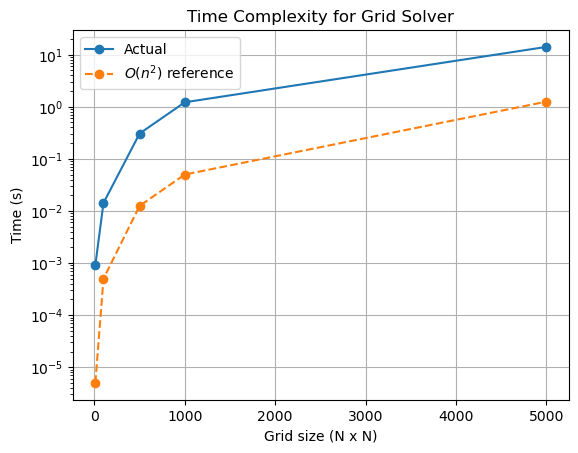

In [ ]:
import time
import random
import matplotlib.pyplot as plt

class GridSolver:
    def __init__(self, maze):
        self.maze = maze
        self.N, self.M = len(maze), len(maze[0])

    def solve(self):
        dp = [[float('inf')] * self.M for _ in range(self.N)]
        parent = [[None] * self.M for _ in range(self.N)]
        
        dp[0][0] = self.maze[0][0]
        
        # Fill DP table
        for i in range(self.N):
            for j in range(self.M):
                if i > 0 and dp[i-1][j] + self.maze[i][j] < dp[i][j]:
                    dp[i][j] = dp[i-1][j] + self.maze[i][j]
                    parent[i][j] = (i-1, j)
                if j > 0 and dp[i][j-1] + self.maze[i][j] < dp[i][j]:
                    dp[i][j] = dp[i][j-1] + self.maze[i][j]
                    parent[i][j] = (i, j-1)
        
        # Backtrack to find path
        path = []
        cur = (self.N-1, self.M-1)
        while cur:
            path.append(cur)
            cur = parent[cur[0]][cur[1]]
        path.reverse()
        
        return path, dp[self.N-1][self.M-1]

if __name__ == "__main__":

    sizes = [10,100,500,1000,5000]   # maze sizes
    times = []

    for size in sizes:
        maze = [[random.randint(1, 10) for _ in range(size)] for _ in range(size)]

        start_time = time.time()
        solver = GridSolver(maze)
        solution = solver.solve()
        end_time = time.time()

        times.append(end_time - start_time)

        print(f"Maze {size}x{size}: Time = {end_time - start_time:.6f} sec")
        print("Path to exit:" if solution else "No path found.")
        print(solution)

    plt.plot(sizes, times, marker='o',label=r'Actual')
    plt.xlabel("Grid size (N x N)")
    plt.yscale('log')
    plt.plot(sizes, [(i**2)*5e-8 for i in sizes], marker='o', linestyle='--', label=r'$O(n^2)$ reference')
    plt.ylabel("Time (s)")
    plt.title("Time Complexity for Grid Solver")
    plt.grid(True)
    plt.legend()
    plt.show()

### Coins

In [ ]:
import itertools # Python package to generate all possible combinations

def brute_force_coin_iter(coins, amount):
    for r in range(1, amount+1):  # max r = amount (worst case: all 1's)
        for combo in itertools.combinations_with_replacement(coins, r):
            if sum(combo) == amount:
                return list(combo)  # first found is minimal since r increases
    return None

coins = [1, 2, 5, 10, 20]
amount = 38
result = brute_force_coin_iter(coins, amount)
print("Brute force result:", result)


Brute force result: [1, 2, 5, 10, 20]


In [ ]:
def greedy_coin(coins, amount):
    coins.sort(reverse=True)  # Sort coins in descending order
    result = []
    for coin in coins:
        while amount >= coin:
            amount -= coin
            result.append(coin)
    return result

coins = [1,2,5,10,20]
amount = 38

result = greedy_coin(coins, amount)
print("Coins used to make", amount, "are:", result)

Coins used to make 38 are: [20, 10, 5, 2, 1]


In [ ]:
import itertools

def greedy_coin(coins, amount):
    coins.sort(reverse=True)  # Sort coins in descending order
    result = []
    for coin in coins:
        while amount >= coin:
            amount -= coin
            result.append(coin)
    return result

def brute_force_coin_iter(coins, amount):
    for r in range(1, amount+1):  # max r = amount (worst case: all 1's)
        for combo in itertools.combinations_with_replacement(coins, r):
            if sum(combo) == amount:
                return list(combo)  # first found is minimal since r increases
    return None

coins = [1,3,4]
amount = 38
resultb = brute_force_coin_iter(coins, amount)
print("Brute Force Approach:", resultb)

resultg = greedy_coin(coins, amount)
print("Greedy Approach:", resultg)


Brute Force Approach: [3, 3, 4, 4, 4, 4, 4, 4, 4, 4]
Greedy Approach: [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]


### Monte Carlo Area Estimation

Actual Area of Polygon: 1.5
N=100, Estimated Area=1.3500, Error=0.1000
N=1000, Estimated Area=1.5240, Error=0.0160
N=10000, Estimated Area=1.4937, Error=0.0042
N=100000, Estimated Area=1.5013, Error=0.0009


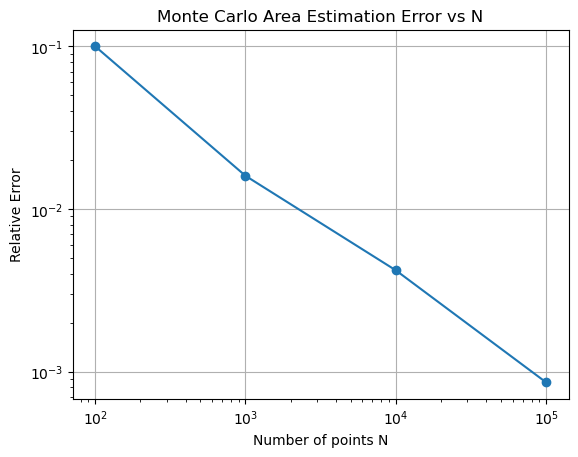

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Example polygon (a triangle)
polygon = np.array([[0,0], [2,0], [1,1.5]])

def point_in_polygon(x, y, poly):
    # Ray-casting method
    # Number of intersections - even/odd rule
    # Even - point is outside
    # Odd - point is inside
    n = len(poly)
    inside = False
    px, py = poly[:,0], poly[:,1]
    j = n-1
    for i in range(n):
        if ((py[i] > y) != (py[j] > y)) and \
           (x < (px[j]-px[i]) * (y - py[i]) / (py[j]-py[i] + 1e-12) + px[i]):
            inside = not inside
        j = i
    return inside

# Bounding rectangle
xmin, ymin = polygon[:,0].min(), polygon[:,1].min()
xmax, ymax = polygon[:,0].max(), polygon[:,1].max()
A_rect = (xmax - xmin) * (ymax - ymin)

N_list = [100, 1000, 10000, 100000]
errors = []

print("Actual Area of Polygon:", 0.5 * 2 * 1.5)

for N in N_list:
    X = np.random.uniform(xmin, xmax, N)
    Y = np.random.uniform(ymin, ymax, N)
    M = sum(point_in_polygon(x, y, polygon) for x, y in zip(X,Y))
    
    A_est = A_rect * M / N
    A_exact = 0.5 * 2 * 1.5  # exact area of triangle
    error = abs(A_est - A_exact) / A_exact
    errors.append(error)
    print(f"N={N}, Estimated Area={A_est:.4f}, Error={error:.4f}")

# Plot error vs N
plt.figure()
plt.loglog(N_list, errors, marker='o')
plt.xlabel("Number of points N")
plt.ylabel("Relative Error")
plt.title("Monte Carlo Area Estimation Error vs N")
plt.grid(True)
plt.show()


Approximate exact area: 1.7811099
N=100, Estimated Area=1.8900, Error=0.0611
N=1000, Estimated Area=1.7460, Error=0.0197
N=10000, Estimated Area=1.8126, Error=0.0177
N=100000, Estimated Area=1.7735, Error=0.0043
N=1000000, Estimated Area=1.7827, Error=0.0009


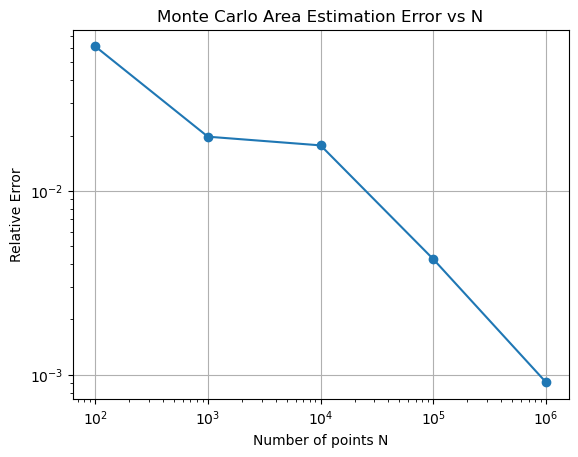

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def inside_shape(x, y):
    return (x**2 + y**2)**4 + x**3 + 3*y**3 <= 0

# Bounding rectangle
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5
A_rect = (xmax - xmin) * (ymax - ymin)

# Different numbers of points
N_list = [100, 1000, 10000, 100000, 1000000]
errors = []

N_exact = 10**7 # Assume that the area computed with 10 million points is the "exact" area
X_exact = np.random.uniform(xmin, xmax, N_exact)
Y_exact = np.random.uniform(ymin, ymax, N_exact)
M_exact = sum(inside_shape(x, y) for x, y in zip(X_exact, Y_exact))
A_exact = A_rect * M_exact / N_exact
print("Approximate exact area:", A_exact)


for N in N_list:
    X = np.random.uniform(xmin, xmax, N)
    Y = np.random.uniform(ymin, ymax, N)
    M = sum(inside_shape(x, y) for x, y in zip(X,Y))
    
    A_est = A_rect * M / N
    error = abs(A_est - A_exact) / A_exact
    errors.append(error)
    print(f"N={N}, Estimated Area={A_est:.4f}, Error={error:.4f}")

# Plot error vs N
plt.figure()
plt.loglog(N_list, errors, marker='o')
plt.xlabel("Number of points N")
plt.ylabel("Relative Error")
plt.title("Monte Carlo Area Estimation Error vs N")
plt.grid(True)
plt.show()


### Trajectory Optimisation

In [ ]:
import numpy as np

def compute_optimal_a(N, dt):
    w = np.array([N-1-i for i in range(N)], dtype=float)
    I = np.eye(N)
    A = I + (dt**4) * np.outer(w,w) + (dt**2) * np.outer(np.ones(N), np.ones(N))
    b = dt**2 * w
    a_opt = np.linalg.solve(A, b)
    return a_opt

# Sample Inputs
N = 10
dt = 1.0
a_opt = compute_optimal_a(N, dt)
print("a_opt:", a_opt)
print("u_N:", dt * a_opt.sum())
print("x_N:", dt**2 * np.dot(np.array([N-1-i for i in range(N)]), a_opt))
print("J:", a_opt.dot(a_opt) + (dt**2 * np.dot(np.array([N-1-i for i in range(N)]), a_opt) - 1)**2 + (dt * a_opt.sum())**2)


a_opt: [ 0.04817128  0.03835861  0.02854594  0.01873327  0.00892061 -0.00089206
 -0.01070473 -0.0205174  -0.03033006 -0.04014273]
u_N: 0.0401427297056199
x_N: 0.9901873327386262
J: 0.009812667261373769


In [8]:
import numpy as np
from scipy.optimize import minimize

def compute_optimal_a(N, dt):
    w = np.array([N-1-i for i in range(N)], dtype=float)
    I = np.eye(N)
    A = I + (dt**4) * np.outer(w,w) + (dt**2) * np.outer(np.ones(N), np.ones(N))
    b = dt**2 * w
    a_opt = np.linalg.solve(A, b)
    return a_opt


def compute_optimal_a_bounded(N, dt, amax):
    # Weight vector
    w = np.array([N-1-i for i in range(N)], dtype=float)
    
    # Cost function
    def J(a):
        u_N = dt * np.sum(a)
        x_N = dt**2 * np.dot(w, a)
        return np.sum(a**2) + (x_N - 1)**2 + u_N**2
    
    # bounds on each a_k
    bounds = [(-np.inf, amax) for _ in range(N)]
    
    a0 = compute_optimal_a(N, dt) # Initial guess
    
    res = minimize(J, a0, bounds=bounds, method='SLSQP', options={'ftol':1e-12})
    
    a_opt = res.x
    u_N = dt * np.sum(a_opt)
    x_N = dt**2 * np.dot(w, a_opt)
    J_min = J(a_opt)
    
    return a_opt, u_N, x_N, J_min

# Sample Inputs
N = 10
dt = 1.0
amax = 0.04
a_opt, u_N, x_N, J_min = compute_optimal_a_bounded(N, dt, amax)

print("Optimal a:", a_opt)
print("u_N:", u_N)
print("x_N:", x_N)
print("Cost J:", J_min)


Optimal a: [ 0.04        0.04        0.03216462  0.02160826  0.01105175  0.00049501
 -0.01006175 -0.02061852 -0.0311753  -0.04173209]
u_N: 0.041731984977793186
x_N: 0.9894431066839109
Cost J: 0.009916701031173562


In [11]:
import numpy as np
from scipy.optimize import minimize

def compute_optimal_a(N, dt):
    w = np.array([N-1-i for i in range(N)], dtype=float)
    I = np.eye(N)
    A = I + (dt**4) * np.outer(w,w) + (dt**2) * np.outer(np.ones(N), np.ones(N))
    b = dt**2 * w
    a_opt = np.linalg.solve(A, b)
    return a_opt

def compute_optimal_a_bounded_debris(N, dt, amax, unsafe_positions, P=100, sigma=0.01):
    w = np.array([N-1-i for i in range(N)], dtype=float)

    # Cost function with debris penalty
    def J(a):
        u_N = dt * np.sum(a)
        x_N = dt**2 * np.dot(w, a)
        # Terminal cost
        cost = np.sum(a**2) + (x_N - 1)**2 + u_N**2
        
        # Compute all positions x_k
        u_k = np.zeros(N)
        x_k = np.zeros(N)
        for k in range(N):
            u_k[k] = dt * np.sum(a[:k+1])
            x_k[k] = dt * np.sum(u_k[:k+1])
        
        # Add penalties
        for xs in unsafe_positions:
            cost += P * np.sum(np.exp(-((x_k - xs)**2)/(2*sigma**2)))
        return cost
    
    # Bounds
    bounds = [(-np.inf, amax) for _ in range(N)]

    a0 = compute_optimal_a(N, dt) # Initial guess
    
    # Solve
    res = minimize(J, a0, bounds=bounds, method='SLSQP', options={'ftol':1e-12})
    
    a_opt = res.x
    u_N = dt * np.sum(a_opt)
    x_N = dt**2 * np.dot(w, a_opt)
    J_min = J(a_opt)
    
    return a_opt, u_N, x_N, J_min

# Example usage
N = 10
dt = 1.0
amax = 0.05
unsafe_positions = [0.4, 0.6]

a_opt, u_N, x_N, J_min = compute_optimal_a_bounded_debris(N, dt, amax, unsafe_positions)
print("Optimal a:", a_opt)
print("u_N:", u_N)
print("x_N:", x_N)
print("J:", J_min)


Optimal a: [ 0.01838171  0.02197463  0.02556725  0.02915991  0.03275231  0.036344
  0.01163681 -0.01307027 -0.03777719 -0.06248458]
u_N: 0.06248456623538016
x_N: 0.9752928077403589
J: 0.014978781222748932
